In [89]:
import xarray as xr
import rioxarray
import geopandas as gpd
import pandas as pd
import numpy as np

# Load the raster as an xarray dataset
raster_path = "../data/elevation/aerodem/aerodem_1987_utm26_3.tif"
raster = rioxarray.open_rasterio(raster_path)

# Load the points from the .geojson file
geojson_path = "../data/misc/centreline_points.geojson"
points_gdf = gpd.read_file(geojson_path)
points_gdf = points_gdf.sort_values(by=["cd"]).reset_index()
points_gdf = points_gdf[points_gdf["glacier_code"] == "DJ"]

# Ensure the points are in the same CRS as the raster
points_gdf = points_gdf.to_crs(raster.rio.crs)

coords = np.array([(geom.x, geom.y) for geom in points_gdf.geometry])

# Separate the coordinates into x and y arrays
xs, ys = coords[:, 0], coords[:, 1]

sampled_values = raster.sel(
    x=xr.DataArray(xs, dims="points"), y=xr.DataArray(ys, dims="points"), method="nearest"
).values

points_gdf["aerodem"] = sampled_values.flatten()


# Load the raster as an xarray dataset
raster_path2 = "../data/elevation/grimpdem/gimpdem4_3_v01.1.tif"
raster2 = rioxarray.open_rasterio(raster_path2)

# Ensure the points are in the same CRS as the raster
points_gdf = points_gdf.to_crs(raster2.rio.crs)

coords = np.array([(geom.x, geom.y) for geom in points_gdf.geometry])

# Separate the coordinates into x and y arrays
xs, ys = coords[:, 0], coords[:, 1]


sampled_values = raster2.sel(
    x=xr.DataArray(xs, dims="points"), y=xr.DataArray(ys, dims="points"), method="nearest"
).values

points_gdf["grimpdem1"] = sampled_values.flatten()


# Load the raster as an xarray dataset
raster_path3 = "../data/elevation/grimpdem/tile_4_3_30m_dem_v02.0.tif"
raster3 = rioxarray.open_rasterio(raster_path3)

# Ensure the points are in the same CRS as the raster
points_gdf = points_gdf.to_crs(raster3.rio.crs)

coords = np.array([(geom.x, geom.y) for geom in points_gdf.geometry])

# Separate the coordinates into x and y arrays
xs, ys = coords[:, 0], coords[:, 1]

sampled_values = raster3.sel(
    x=xr.DataArray(xs, dims="points"), y=xr.DataArray(ys, dims="points"), method="nearest"
).values

points_gdf["grimpdem2"] = sampled_values.flatten()


netcdf_path = "../data/misc/bedmachine/BedMachineGreenland-v5.nc"
netcdf_data = xr.open_dataset(netcdf_path)
# Ensure the points are in the same CRS as the NetCDF data

# Extract the coordinates of the points
coords = np.array([(geom.x, geom.y) for geom in points_gdf.geometry])

# Sample the NetCDF data at each point
sampled_values = (
    netcdf_data["bed"]
    .sel(
        x=xr.DataArray(xs, dims="points"), y=xr.DataArray(ys, dims="points"), method="nearest"
    )
    .values
)

sampled_values

# # Add the sampled values from the NetCDF to the GeoDataFrame
points_gdf["bed"] = sampled_values


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(
    points_gdf["cd"],
    points_gdf["aerodem"],
    c="blue",
    marker="o",
    # linestyle="",
    markersize=2,
)
plt.plot(
    points_gdf["cd"],
    points_gdf["grimpdem1"],
    c="red",
    marker="o",
    # linestyle="",
    markersize=2,
)
plt.plot(
    points_gdf["cd"],
    points_gdf["grimpdem2"],
    c="green",
    marker="o",
    # linestyle="",
    markersize=2,
)
plt.plot(
    points_gdf["cd"],
    points_gdf["bed"],
    c="black",
    marker="o",
    # linestyle="",
    markersize=2,
)
plt.title("Sampled Raster Values vs. CD")
plt.xlabel("CD")
plt.ylabel("Sampled Raster Value")
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

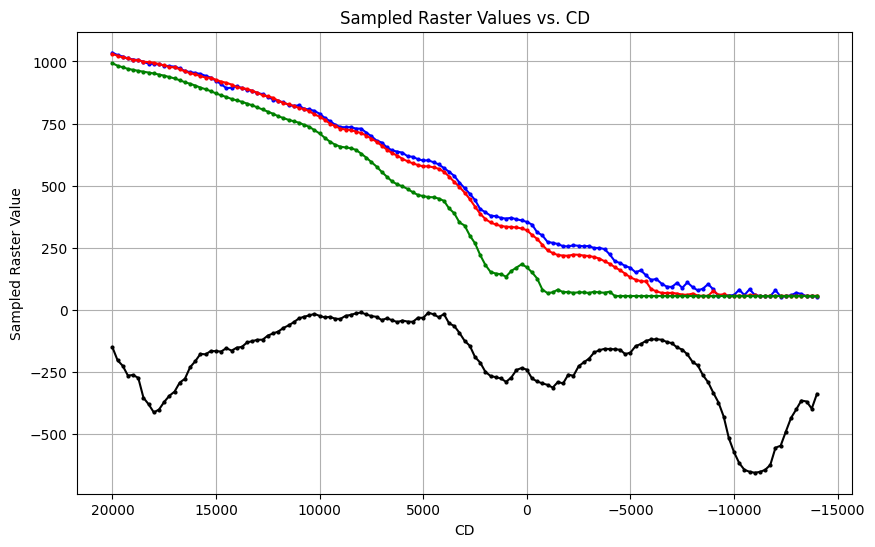

In [96]:
import xarray as xr
import rioxarray
import geopandas as gpd
import pandas as pd
import numpy as np

# Load the raster as an xarray dataset
raster_path = "../data/elevation/aerodem/aerodem_1981_utm25.tif"
raster = rioxarray.open_rasterio(raster_path)

# Load the points from the .geojson file
geojson_path = "../data/misc/centreline_points.geojson"
points_gdf = gpd.read_file(geojson_path)
points_gdf = points_gdf.sort_values(by=["cd"]).reset_index()
points_gdf = points_gdf[points_gdf["glacier_code"] == "UI"]
points_gdf = points_gdf[points_gdf["cd"] <= 20000]

# Ensure the points are in the same CRS as the raster
points_gdf = points_gdf.to_crs(raster.rio.crs)

coords = np.array([(geom.x, geom.y) for geom in points_gdf.geometry])

# Separate the coordinates into x and y arrays
xs, ys = coords[:, 0], coords[:, 1]

sampled_values = raster.sel(
    x=xr.DataArray(xs, dims="points"), y=xr.DataArray(ys, dims="points"), method="nearest"
).values

points_gdf["aerodem"] = sampled_values.flatten()


# Load the raster as an xarray dataset
raster_path2 = "../data/elevation/grimpdem/gimpdem4_2_v01.1.tif"
raster2 = rioxarray.open_rasterio(raster_path2)

# Ensure the points are in the same CRS as the raster
points_gdf = points_gdf.to_crs(raster2.rio.crs)

coords = np.array([(geom.x, geom.y) for geom in points_gdf.geometry])

# Separate the coordinates into x and y arrays
xs, ys = coords[:, 0], coords[:, 1]


sampled_values = raster2.sel(
    x=xr.DataArray(xs, dims="points"), y=xr.DataArray(ys, dims="points"), method="nearest"
).values

points_gdf["grimpdem1"] = sampled_values.flatten()


# Load the raster as an xarray dataset
raster_path3 = "../data/elevation/grimpdem/tile_4_2_30m_dem_v02.0.tif"
raster3 = rioxarray.open_rasterio(raster_path3)

# Ensure the points are in the same CRS as the raster
points_gdf = points_gdf.to_crs(raster3.rio.crs)

coords = np.array([(geom.x, geom.y) for geom in points_gdf.geometry])

# Separate the coordinates into x and y arrays
xs, ys = coords[:, 0], coords[:, 1]

sampled_values = raster3.sel(
    x=xr.DataArray(xs, dims="points"), y=xr.DataArray(ys, dims="points"), method="nearest"
).values

points_gdf["grimpdem2"] = sampled_values.flatten()


netcdf_path = "../data/misc/bedmachine/BedMachineGreenland-v5.nc"
netcdf_data = xr.open_dataset(netcdf_path)
# Ensure the points are in the same CRS as the NetCDF data

# Extract the coordinates of the points
coords = np.array([(geom.x, geom.y) for geom in points_gdf.geometry])

# Sample the NetCDF data at each point
sampled_values = (
    netcdf_data["bed"]
    .sel(
        x=xr.DataArray(xs, dims="points"), y=xr.DataArray(ys, dims="points"), method="nearest"
    )
    .values
)

sampled_values

# # Add the sampled values from the NetCDF to the GeoDataFrame
points_gdf["bed"] = sampled_values


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(
    points_gdf["cd"],
    points_gdf["aerodem"],
    c="blue",
    marker="o",
    # linestyle="",
    markersize=2,
)
plt.plot(
    points_gdf["cd"],
    points_gdf["grimpdem1"],
    c="red",
    marker="o",
    # linestyle="",
    markersize=2,
)
plt.plot(
    points_gdf["cd"],
    points_gdf["grimpdem2"],
    c="green",
    marker="o",
    # linestyle="",
    markersize=2,
)
plt.plot(
    points_gdf["cd"],
    points_gdf["bed"],
    c="black",
    marker="o",
    # linestyle="",
    markersize=2,
)
plt.title("Sampled Raster Values vs. CD")
plt.xlabel("CD")
plt.ylabel("Sampled Raster Value")
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

## Surface Elevation Change

In [253]:
import json
from pathlib import Path

import ee
import geopandas as gpd
import numpy as np
import pandas as pd
import s3fs as s3
import xarray as xr
from shapely import LineString, Point
from shapely.ops import split
from scipy import stats


def checkempty(img):
    """





























































































































    for checking if there are any icesat offset corrections in ArcticDEM ee.Image





























































































































    adds 'isEmpty' field. True if no corrections.
    """


    img = img.set("isEmpty", ee.Algorithms.IsEqual(img.get("registrationDX"), None))

    return img



def adjust(img):
    """





























































































































    img, ee.Image





























































































































    uses dx,dy,dz corrections to translate image and add elevation offset





























































































































    returns ee.Image with new band `adjusted` containing the offset elevations
    """


    _dx = img.get("registrationDX")

    _dy = img.get("registrationDY")

    _dz = img.get("registrationDZ")

    img = img.translate(_dx, _dy, units="meters")

    _zoff = ee.Image.constant(_dz).rename("dz")

    img = img.addBands((img.select("elevation").add(_zoff)).rename("adjusted"))

    return img

### CryoTEMPO-EOLIS
EOLIS elevation data generated using swath processing of CryoSat data [(Gourmelen, N., Escorihuela, M., Shepherd, A., Foresta, L., Muir, A., Garcia-Mondejar, A., Roca, M., Baker, S., & Drinkwater, M. R. (2018))](https://doi.org/10.1016/j.asr.2017.11.014) and provided by the [ESA CryoTEMPO project](https://cryotempo-eolis.org/)

data downloaded from [cs2eo](https://cs2eo.org/) using [this search query](https://cs2eo.org/search?searchMode=single-polygon&productA=TEMPO_SWATH_GRID&polygon=[[-50.35,64.23],[-49.1,64.25],[-49.03,63.71],[-50.26,63.67],[-50.35,64.23]]&startDate=2010-01-01&startTime=00:00&endDate=2023-01-01&endTime=00:00&trackSpacing=100&batchRequest=false)
the `.csv` file generated from this is saved in `../data/sec/cryosat/`. This contains links to individual .nc files which can be downloaded with the below code.

In [ ]:
# only needs running if you need to download the files
path = "../data/sec/cryosat/"  # where to save the files / where the .csv file is
# path = glob(path+'*.csv')
# files = pd.read_csv(path[0])

# from ftplib import FTP
# password = 'ed.holt@ed.ac.uk'
# ftp = FTP('science-pds.cryosat.esa.int')
# ftp.login('anonymous',password)

# for product_path in tqdm(files['TEMPO_SWATH_GRID product path']):
#     path, file = os.path.split(product_path)
#     ftp.cwd(path)
#     with open(path+file, 'wb') as f:
#         ftp.retrbinary('RETR ' + file, f.write)

In [ ]:
ps = gpd.read_feather("../data/samplePoints_feather")
path = "../data/sec/cryosat/"  # where files are saved
cs_files = glob(path + "*.nc")

# read in stack of .nc files, add projection and convert time datetime
cs = xr.open_mfdataset(cs_files)  # cs means cryosat
cs = cs["elevation"].transpose("time", "y", "x").rio.write_crs("epsg:3413")

cs["time"] = pd.to_datetime(cs["time"], unit="s")

# get query points
xquery = ps.set_index(["glacier", "cd"])["x"].to_xarray()
yquery = ps.set_index(["glacier", "cd"])["y"].to_xarray()

# sample stack of .nc files, compute dask-chunks, and convert to dataframe
cs_sample = cs.sel(x=xquery, y=yquery, method="nearest")
cs_sample = xr.where(~(xquery.isnull()), cs_sample, np.nan).rename(
    "elevation"
)  # .to_dataframe()

cs_df = cs_sample.compute().to_dataframe().reset_index().dropna()

# add a years since earliest date for use in linear regression
cs_df["years"] = (cs_df["time"] - cs_df["time"].min()) / pd.Timedelta("365.25D")

# removing points along centreline where there are too few measurements
# measurements are not spaced far enough apart in time.
# needed because different time steps have different coverage
cs_date_range = cs_df.groupby(["glacier", "cd"])["years"].agg(np.ptp)
mean, std = cs_date_range.agg(["mean", "std"])
cs_df = cs_df.set_index(["glacier", "cd"]).loc[cs_date_range > (mean - std)].reset_index()

# linear regression for each point along each glacier centreline
cs_slopes = (
    cs_df.groupby(["glacier", "cd"])
    .apply(lambda q: pd.Series(stats.linregress(x=q["years"], y=q["elevation"])))
    .reset_index()
    .rename(columns={0: "slope", 1: "intercept", 2: "rvalue", 3: "pvalue", 4: "stderr"})
)

cs_slopes["Source"] = "CryoTEMPO-EOLIS"
cs_slopes[
    "Source:Period"
] = f'CryoTEMPO-EOLIS: {cs_df["time"].min().strftime("%b %Y")}-{cs_df["time"].max().strftime("%b %Y")}'

### ICESat-2 ATL15

In [213]:
from scipy import stats

ps = gpd.read_file("../data/misc/centreline_points.geojson")
ps = ps.sort_values(by=["glacier_code", "cd"]).reset_index()

atl15_file = "../data/elevation/icesat2/ATL15_GL_0318_01km_003_01.nc"
atl15 = xr.open_dataset(
    atl15_file, group="delta_h", chunks={"x": "auto", "y": "auto"}
).rio.write_crs(3413)

xquery = ps.set_index(["glacier_code", "cd"]).geometry.x.to_xarray()
yquery = ps.set_index(["glacier_code", "cd"]).geometry.y.to_xarray()

atl_sampled = atl15.sel(x=xquery, y=yquery, method="nearest")
atl_sampled = xr.where(~(xquery.isnull()), atl_sampled, np.nan)

# Compute years and days
time_min = atl_sampled.time.min().values
time_delta = (atl_sampled.time - time_min) / np.timedelta64(1, "D")  # Convert to days
years = time_delta / 365.25  # Convert days to years as float

# Combine years and days into a single coordinate
atl_sampled["years"] = xr.DataArray(years, dims="time")

atl_sampled = atl_sampled.compute()

# # slope, intercept, rvalue, pvalue, stderr
# atl_slopes = xr.apply_ufunc(
#     lambda x, y: np.array(stats.linregress(x, y)),
#     atl_sampled["years"],
#     atl_sampled["delta_h"],
#     input_core_dims=[["time"], ["time"]],
#     output_core_dims=[["stats"]],
#     vectorize=True,
# )

atl_sampled["Source"] = "IceSat-2 ATL15"
atl_sampled[
    "Source:Period"
] = f"ICESat-2 ATL15: {atl_sampled.time.min().values.astype('datetime64[D]')}-{atl_sampled.time.max().values.astype('datetime64[D]')}"

[  2.9646606    3.746643     5.581604     0.01245117  -0.8199463
   0.          -0.19000244  -3.2131958   -5.2870483   -4.6835327
  -3.918457    -6.9092407   -9.627563    -8.751831    -7.38208
  -9.910645   -11.523132    -9.41803     -9.526123  ]


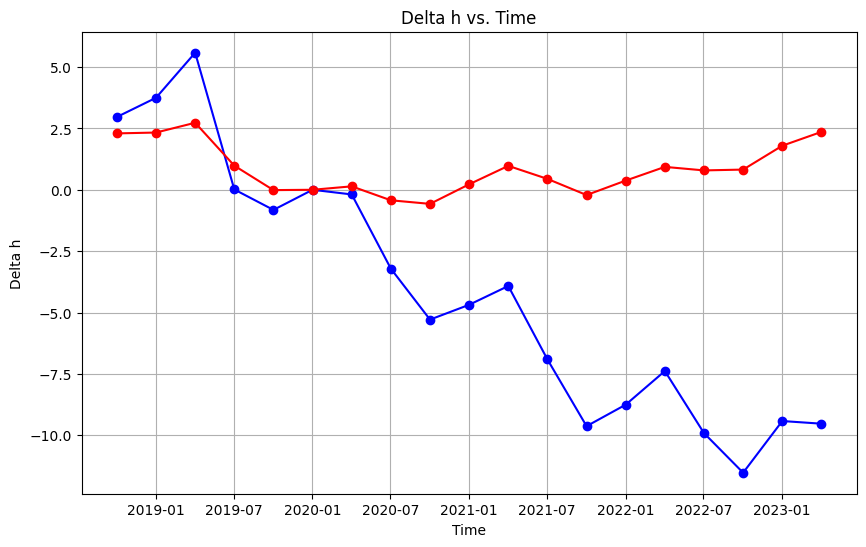

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

filtered = atl_sampled.sel(cd=10000)
filtered["time"] = pd.to_datetime(filtered["time"])

plt.figure(figsize=(10, 6))

filtered_df_ui = filtered.sel(glacier_code="UI")
print(filtered_df_ui["delta_h"].values)
plt.plot(filtered_df_ui["time"], filtered_df_ui["delta_h"], marker="o", c="blue")

filtered_df_dj = filtered.sel(glacier_code="DJ")
plt.plot(filtered_df_dj["time"], filtered_df_dj["delta_h"], marker="o", c="red")


plt.title("Delta h vs. Time")
plt.xlabel("Time")
plt.ylabel("Delta h")
plt.grid(True)
plt.show()

2018-10-01T22:30:00.000000000
2019-01-01T06:00:00.000000000
2019-04-02T13:30:00.000000000
2019-07-02T21:00:00.000000000
2019-10-02T04:30:00.000000000
2020-01-01T12:00:00.000000000
2020-04-01T19:30:00.000000000
2020-07-02T03:00:00.000000000
2020-10-01T10:30:00.000000000
2020-12-31T18:00:00.000000000
2021-04-02T01:30:00.000000000
2021-07-02T09:00:00.000000000
2021-10-01T16:30:00.000000000
2022-01-01T00:00:00.000000000
2022-04-02T07:30:00.000000000
2022-07-02T15:00:00.000000000
2022-10-01T22:30:00.000000000
2023-01-01T06:00:00.000000000
2023-04-02T13:30:00.000000000


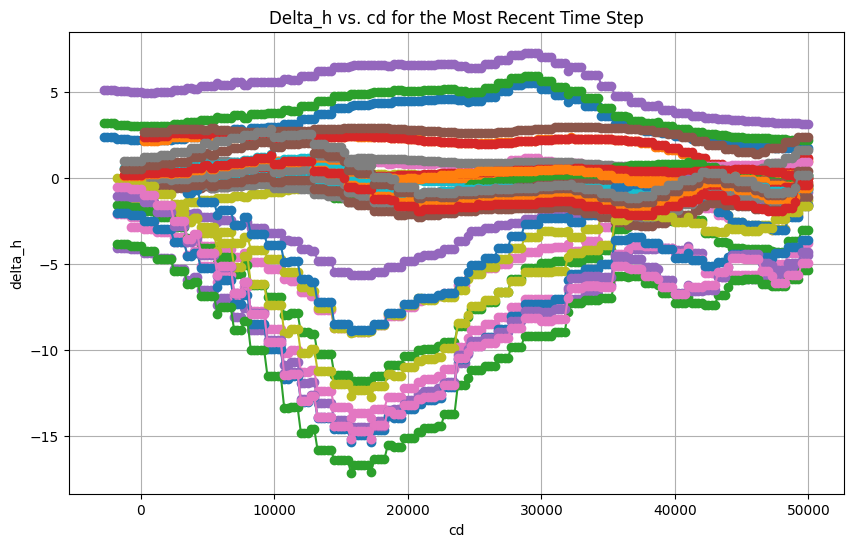

In [246]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import matplotlib.colorbar as colorbar

# Select the most recent time step
recent_time_step = atl_sampled["time"]
filtered["time"] = pd.to_datetime(filtered["time"])

plt.figure(figsize=(10, 6))

# Define colormap and normalization


for i, time_step in enumerate(recent_time_step):
    print(time_step.values)
    recent = atl_sampled.sel(time=time_step)

    filtered_df_ui = recent.sel(glacier_code="UI")
    plt.plot(
        filtered_df_ui["cd"],
        filtered_df_ui["delta_h"],
        marker="o",
        label=time_step,
    )

    filtered_df_dj = recent.sel(glacier_code="DJ")
    plt.plot(
        filtered_df_dj["cd"],
        filtered_df_dj["delta_h"],
        marker="o",
        label=time_step,
    )

# Plot delta_h against cd
plt.xlabel("cd")
plt.ylabel("delta_h")
plt.title("Delta_h vs. cd for the Most Recent Time Step")
# plt.legend()
plt.grid(True)
plt.show()

### ArcticDEM 
[ArcticDEM Strips](https://developers.google.com/earth-engine/datasets/catalog/UMN_PGC_ArcticDEM_V3_2m#description) [(Porter et al., 2018)](https://doi.org/10.7910/DVN/OHHUKH) accessed using Google Earth Engine. This requires authenticating/giving google permissions to run this notebook

In [ ]:
import ee

ee.Authenticate()
ee.Initialize()
import geemap

In [256]:
# create centrelines from points
ps = gpd.read_feather(
    "C:/Users/olive/Scratch/reference/holt_isortuarsuup-sermia_10-5281-zendono-7824987/tlohde-isortuarsuupSermia-396b33c/data/samplePoints_feather"
)

cl = (
    ps.reset_index()
    .sort_values(by="cd")
    .groupby("glacier")["geometry"]
    .apply(lambda x: LineString(x.tolist()))
)
cl = gpd.GeoDataFrame(cl.set_crs(3413, inplace=True))

# convert to earth engine feature collection
eecl = geemap.geopandas_to_ee(cl.to_crs(4326))

# create earth engine image collection
dem = ee.ImageCollection("UMN/PGC/ArcticDEM/V3/2m").filterBounds(eecl)
dem = dem.sort("system:time_start")

# map the above functions over the arctic dem collection
dem = dem.map(checkempty).filter(ee.Filter.eq("isEmpty", False)).map(adjust)

# sample using feature collection, return dataframe
samples = dem.select(["elevation", "adjusted"]).getRegion(eecl, scale=50).getInfo()
samples_df = pd.DataFrame(samples[1:], columns=samples[0])
samples_df.dropna(inplace=True)

# convert to geodataframe
samples_df["geometry"] = gpd.points_from_xy(
    samples_df["longitude"], samples_df["latitude"], crs=4326
)
arctic_gdf = gpd.GeoDataFrame(samples_df).to_crs(3413)

# work out which glacier each returned point belongs to...by overlaying with the centrelines (buffered by a nominal 1000 m)
arctic_gdf = (
    gpd.GeoDataFrame(geometry=cl.buffer(1000), crs=3413)
    .reset_index()
    .overlay(arctic_gdf, keep_geom_type=False)
)

# the points returned by `.getRegion()` are the pixel coordinates, not those of the sample points, and because the 'id' from `ps` is lost
# we need to work out how far along each line the point is using shapely's `project` which
# "returns the distance along this geometric object to a point nearest the other object"

cl_dict = cl[
    "geometry"
].to_dict()  # to make sure you are measuring along the right correct line
arctic_gdf["along_line"] = arctic_gdf.apply(
    lambda q: cl_dict[q["glacier"]].project(q["geometry"]), axis=1
)

# bin distances along centreline into 50 m intervals. taking mean if therea are multiple points in a 50 m bin for given time
bins = np.arange(0, 16000, 50)
arctic_gdf["bin"] = pd.cut(arctic_gdf["along_line"], bins, retbins=False)
arctic_gdf["cd"] = arctic_gdf["bin"].apply(lambda x: x.mid)
arctic_z = (
    arctic_gdf.groupby(["glacier", "time", "cd"])[["elevation", "adjusted"]]
    .mean()
    .reset_index()
    .dropna()
)

# convert time from milliseconds, and add years since first in record for easy thing to regress against
arctic_z["time"] = pd.to_datetime(arctic_z["time"], unit="ms")
arctic_z["years"] = (arctic_z["time"] - arctic_z["time"].min()) / pd.Timedelta("365.25D")

# linear regression by glacier and point along centreline
arctic_slopes = (
    arctic_z.groupby(["glacier", "cd"])
    .apply(lambda q: pd.Series(stats.linregress(x=q["years"], y=q["adjusted"])))
    .reset_index()
    .rename(columns={0: "slope", 1: "intercept", 2: "rvalue", 3: "pvalue", 4: "stderr"})
)

# add a name and get date range
arctic_slopes["Source"] = "ArcticDEM"
arctic_slopes[
    "Source:Period"
] = f'ArcticDEM: {arctic_z["time"].min().strftime("%b %Y")}-{arctic_z["time"].max().strftime("%b %Y")}'

C:\Users\olive\AppData\Local\Temp\ipykernel_35668\4215174999.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arctic_gdf.groupby(["glacier", "time", "cd"])[["elevation", "adjusted"]]
C:\Users\olive\AppData\Local\Temp\ipykernel_35668\4215174999.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arctic_z.groupby(["glacier", "cd"])


In [257]:
arctic_slopes

glacier       cd     slope   intercept    rvalue  \
0     IsortuarsuupSermia     25.0 -3.009716  509.158084 -0.471393   
1     IsortuarsuupSermia     75.0 -3.469200  518.479562 -0.694757   
2     IsortuarsuupSermia    125.0 -5.277364  532.844643 -0.954461   
3     IsortuarsuupSermia    175.0 -5.170502  533.084407 -0.891668   
4     IsortuarsuupSermia    225.0 -5.079244  534.952762 -0.941384   
..                   ...      ...       ...         ...       ...   
633  KangaasarsuupSermia  15725.0 -0.913289  781.928118 -0.767767   
634  KangaasarsuupSermia  15775.0 -0.926200  782.638324 -0.888942   
635  KangaasarsuupSermia  15825.0 -0.658365  783.686944 -0.931578   
636  KangaasarsuupSermia  15875.0 -0.875408  786.351494 -0.901410   
637  KangaasarsuupSermia  15925.0 -0.675206  786.148815 -0.855662   

           pvalue    stderr     Source                 Source:Period  
0    8.883850e-02  1.625483  ArcticDEM  ArcticDEM: Mar 2011-Sep 2017  
1    5.821358e-03  1.036771  ArcticDEM  ArcticDEM: Mar 2011-Sep 2017  
2    1.166882e-07  0.476182  ArcticDEM  ArcticDEM: Mar 2011-Sep 2017  
3    1.840873e-05  0.757775  ArcticDEM  ArcticDEM: Mar 2011-Sep 2017  
4    1.592639e-06  0.548782  ArcticDEM  ArcticDEM: Mar 2011-Sep 2017  
..            ...       ...        ...                           ...  
633  5.152026e-04  0.203699  ArcticDEM  ArcticDEM: Mar 2011-Sep 2017  
634  4.146433e-06  0.127542  ArcticDEM  ArcticDEM: Mar 2011-Sep 2017  
635  1.568946e-07  0.068665  ArcticDEM  ArcticDEM: Mar 2011-Sep 2017  
636  1.864179e-06  0.112377  ArcticDEM  ArcticDEM: Mar 2011-Sep 2017  
637  2.368670e-05  0.109146  ArcticDEM  ArcticDEM: Mar 2011-Sep 2017  

[638 rows x 9 columns]

C:\Users\olive\AppData\Local\Temp\ipykernel_35668\1504543660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_slopes.sort_values(by="Source:Period", inplace=True)
C:\Users\olive\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\olive\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\olive\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: Futur

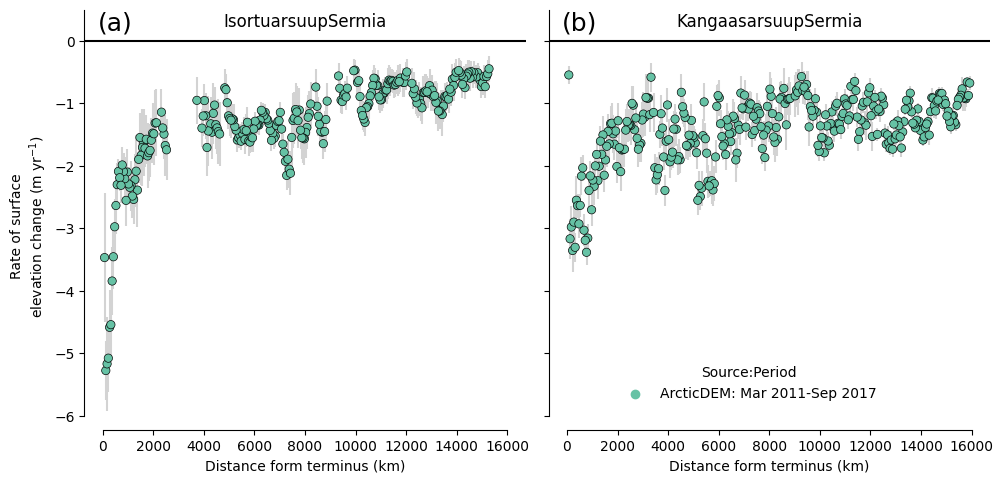

In [259]:
import seaborn as sns

all_slopes = arctic_slopes
all_slopes = all_slopes.loc[all_slopes["pvalue"] < 0.05]
all_slopes.sort_values(by="Source:Period", inplace=True)
# all_slopes["cd_km"] = all_slopes["cd"] / 1000

fg = sns.relplot(
    data=all_slopes,
    x="cd",
    y="slope",
    col="glacier",
    hue="Source:Period",
    palette=[sns.color_palette("Set2")[i] for i in [0, 1, 5]],
    edgecolor="k",
    style="Source:Period",
    markers=["o", "d", "P"],
)

# error bars
for g, ax in fg.axes_dict.items():
    ax.axhline(0, c="k")
    for source_date in all_slopes["Source:Period"].unique():
        tmp = all_slopes.loc[
            (all_slopes["Source:Period"] == source_date) & (all_slopes["glacier"] == g)
        ]
        ax.errorbar(
            tmp["cd"],
            tmp["slope"],
            yerr=tmp["stderr"],
            fmt="None",
            ecolor="lightgrey",
            zorder=0.5,
        )

# formatting
fg.set(ylabel=("Rate of surface\nelevation change (m yr$^{-1}$)"))
fg.set(xlabel=("Distance form terminus (km)"))
# fg.set(xlim=(-0.4, 16.1), ylim=(-6.1, 0.6))

sns.move_legend(fg, loc="lower right", bbox_to_anchor=(0.7, 0.15))
fg.despine(trim=True)

labs = "abcdef"
for i, ax in enumerate(fg.axes.flat):
    ax.spines["left"].set_bounds(high=0.5)
    ax.annotate(f"({labs[i]})", xy=(0.03, 0.98), xycoords="axes fraction", fontsize=18)
    t = ax.get_title()
    ax.set_title(t.split("glacier = ")[1], y=0.97)

In [265]:
# create centrelines from points

cl = gpd.read_file("../data/misc/centreline_lines.geojson")

# convert centreline to earth engine feature collection
eecl = geemap.geopandas_to_ee(cl.to_crs(4326))

# create earth engine image collection
dem = ee.ImageCollection("UMN/PGC/ArcticDEM/V3/2m").filterBounds(eecl)
dem = dem.sort("system:time_start")

dem

# # map the above functions over the arctic dem collection
# dem = dem.map(checkempty).filter(ee.Filter.eq("isEmpty", False)).map(adjust)

# # sample using feature collection, return dataframe
# samples = dem.select(["elevation", "adjusted"]).getRegion(eecl, scale=50).getInfo()
# samples_df = pd.DataFrame(samples[1:], columns=samples[0])
# samples_df.dropna(inplace=True)

# # convert to geodataframe
# samples_df["geometry"] = gpd.points_from_xy(
#     samples_df["longitude"], samples_df["latitude"], crs=4326
# )
# arctic_gdf = gpd.GeoDataFrame(samples_df).to_crs(3413)

# # work out which glacier each returned point belongs to...by overlaying with the centrelines (buffered by a nominal 1000 m)
# arctic_gdf = (
#     gpd.GeoDataFrame(geometry=cl.buffer(1000), crs=3413)
#     .reset_index()
#     .overlay(arctic_gdf, keep_geom_type=False)
# )

# # the points returned by `.getRegion()` are the pixel coordinates, not those of the sample points, and because the 'id' from `ps` is lost
# # we need to work out how far along each line the point is using shapely's `project` which
# # "returns the distance along this geometric object to a point nearest the other object"

# cl_dict = cl[
#     "geometry"
# ].to_dict()  # to make sure you are measuring along the right correct line
# arctic_gdf["along_line"] = arctic_gdf.apply(
#     lambda q: cl_dict[q["glacier"]].project(q["geometry"]), axis=1
# )

# # bin distances along centreline into 50 m intervals. taking mean if therea are multiple points in a 50 m bin for given time
# bins = np.arange(0, 16000, 50)
# arctic_gdf["bin"] = pd.cut(arctic_gdf["along_line"], bins, retbins=False)
# arctic_gdf["cd"] = arctic_gdf["bin"].apply(lambda x: x.mid)
# arctic_z = (
#     arctic_gdf.groupby(["glacier", "time", "cd"])[["elevation", "adjusted"]]
#     .mean()
#     .reset_index()
#     .dropna()
# )

# # convert time from milliseconds, and add years since first in record for easy thing to regress against
# arctic_z["time"] = pd.to_datetime(arctic_z["time"], unit="ms")
# arctic_z["years"] = (arctic_z["time"] - arctic_z["time"].min()) / pd.Timedelta("365.25D")

# # linear regression by glacier and point along centreline
# arctic_slopes = (
#     arctic_z.groupby(["glacier", "cd"])
#     .apply(lambda q: pd.Series(stats.linregress(x=q["years"], y=q["adjusted"])))
#     .reset_index()
#     .rename(columns={0: "slope", 1: "intercept", 2: "rvalue", 3: "pvalue", 4: "stderr"})
# )

# # add a name and get date range
# arctic_slopes["Source"] = "ArcticDEM"
# arctic_slopes[
#     "Source:Period"
# ] = f'ArcticDEM: {arctic_z["time"].min().strftime("%b %Y")}-{arctic_z["time"].max().strftime("%b %Y")}'

### figure 5
combine rates of change from CryoSat-2, ICESat-2 and ArcticDEM

In [ ]:
all_slopes = pd.concat([cs_slopes, atl_slopes, arctic_slopes])
all_slopes = all_slopes.loc[all_slopes["pvalue"] < 0.05]
all_slopes.sort_values(by="Source:Period", inplace=True)
all_slopes["cd_km"] = all_slopes["cd"] / 1000

fg = sns.relplot(
    data=all_slopes,
    x="cd_km",
    y="slope",
    col="glacier",
    hue="Source:Period",
    palette=[sns.color_palette("Set2")[i] for i in [0, 1, 5]],
    edgecolor="k",
    style="Source:Period",
    markers=["o", "d", "P"],
)

# error bars
for g, ax in fg.axes_dict.items():
    ax.axhline(0, c="k")
    for source_date in all_slopes["Source:Period"].unique():
        tmp = all_slopes.loc[
            (all_slopes["Source:Period"] == source_date) & (all_slopes["glacier"] == g)
        ]
        ax.errorbar(
            tmp["cd_km"],
            tmp["slope"],
            yerr=tmp["stderr"],
            fmt="None",
            ecolor="lightgrey",
            zorder=0.5,
        )

# formatting
fg.set(ylabel=("Rate of surface\nelevation change (m yr$^{-1}$)"))
fg.set(xlabel=("Distance form terminus (km)"))
fg.set(xlim=(-0.4, 16.1), ylim=(-6.1, 0.6))

sns.move_legend(fg, loc="lower right", bbox_to_anchor=(0.7, 0.15))
fg.despine(trim=True)

labs = "abcdef"
for i, ax in enumerate(fg.axes.flat):
    ax.spines["left"].set_bounds(high=0.5)
    ax.annotate(f"({labs[i]})", xy=(0.03, 0.98), xycoords="axes fraction", fontsize=18)
    t = ax.get_title()
    ax.set_title(t.split("glacier = ")[1], y=0.97)

fg.fig.savefig("../figures/f05.png", bbox_inches="tight")

print(
    "Figure 5: Rates of surface elevation change at (A) Isortuarsuup Sermia and (B) Kangaasarsuup Sermia from \n\
    ArcticDEM (green circles, 2011–2017), CryoTEMPO-EOLIS (red diamonds, 2010-2022), \n\
        and ICESat-2 ATL15  (yellow crosses, 2018-2022). \n\
            Rates determined from linear regression. Only significant trends (p ≤ .05) are shown. \n\
                Error bars denote standard error of the estimate. \n\
                    Note: both ICESat-2 and CryoTEMPO-EOLIS data have been sampled at an interval greater \n\
                        than their respective grid resolutions."
)

6 strips found


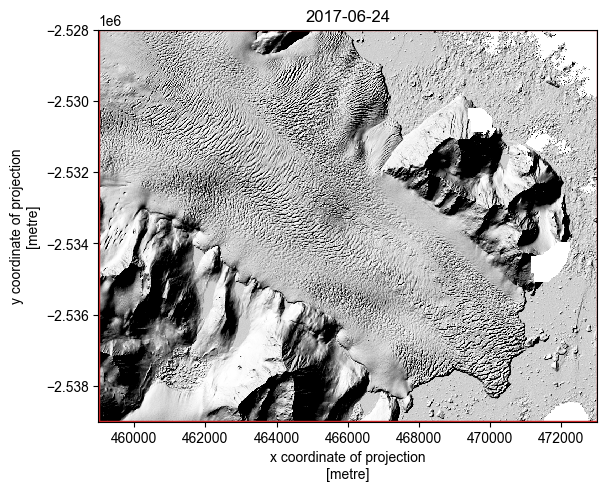

In [275]:
import os
import pdemtools as pdt
import matplotlib.pyplot as plt

plt.rcParams["figure.constrained_layout.use"] = True
plt.rcParams["font.sans-serif"] = "Arial"

index_fpath = "../data/elevation/arcticdem/ArcticDEM_Strip_Index_s2s041.parquet"
bm_fpath = "../data/misc/bedmachine/BedMachineGreenland-v5.nc"

bounds = (459000, -2539000, 473000, -2528000)

gdf = pdt.search(
    index_fpath,
    bounds,
    dates="20170101/20221231",
    months=[6, 7, 8, 9],
    years=[2017, 2021],
    baseline_max_hours=24,
    sensors=["WV03", "WV02", "WV01"],
    accuracy=2,
    min_aoi_frac=0.7,
)

gdf = gdf.sort_values("acqdate1")
print(f"{len(gdf)} strips found")

# =================
# SCENE TO PREVIEW
i = 1
# =================
preview = pdt.load.preview(gdf.iloc[[i]], bounds)
plt.close()

fig, ax = plt.subplots(layout="constrained")
preview.plot(cmap="Greys_r", add_colorbar=False)
gdf.iloc[[i]].plot(ax=ax, fc="none", ec="tab:red")
ax.set_title(gdf.iloc[[i]].acqdate1.dt.date.values[0])

selected_scenes = [1, 5]

if not os.path.exists("../data/elevation/arcticdem/test"):
    os.mkdir("../data/elevation/arcticdem/test")

gdf_sel = gdf.iloc[selected_scenes]
gdf_sel.to_file("../data/elevation/arcticdem/test/scenes.gpkg")


def download_scene(gdf_row, dem_id, output_directory="../data/elevation/arcticdem/test"):
    dem = pdt.load.from_search(gdf_row, bounds=bounds, bitmask=True)
    dem.compute()
    dem.rio.to_raster(
        os.path.join(output_directory, f"{dem_id}.tif"), compress="ZSTD", predictor=3, zlevel=1
    )
    return dem


dem_1 = download_scene(gdf_sel.iloc[[0]], gdf_sel.iloc[[0]].dem_id.values[0])
dem_2 = download_scene(gdf_sel.iloc[[1]], gdf_sel.iloc[[1]].dem_id.values[0])

In [276]:
dem_1 = pdt.load.from_fpath(
    os.path.join(
        "../data/elevation/arcticdem/test", f"{gdf_sel.iloc[[0]].dem_id.values[0]}.tif"
    ),
    bounds=bounds,
)
dem_2 = pdt.load.from_fpath(
    os.path.join(
        "../data/elevation/arcticdem/test", f"{gdf_sel.iloc[[1]].dem_id.values[0]}.tif"
    ),
    bounds=bounds,
)

In [282]:
hillshade_1 = dem_1.pdt.terrain(
    "hillshade", hillshade_multidirectional=True, hillshade_z_factor=2
)

In [279]:
bedrock_mask = pdt.data.bedrock_mask_from_bedmachine(bm_fpath, dem_1)

In [280]:
dem_2_coreg = dem_2.pdt.coregister(dem_1, bedrock_mask)
# dem = dem.rio.pad_box(*bounds, constant_values=np.nan)

Planimetric Correction Iteration 1
Offset (z,x,y): 0.000, 0.000, 0.000
RMSE = 5.008943557739258
Planimetric Correction Iteration 2
Offset (z,x,y): -0.506, -5.149, 5.180
Translating: -0.51 Z, -5.15 X, 5.18 Y
RMSE = 3.56615948677063
Planimetric Correction Iteration 3
Offset (z,x,y): -0.281, -5.238, 5.126
Translating: -0.28 Z, -5.24 X, 5.13 Y
RMSE = 3.5588386058807373
Planimetric Correction Iteration 4
Offset (z,x,y): -0.276, -5.241, 5.124
Translating: -0.28 Z, -5.24 X, 5.12 Y
RMSE = 3.5588464736938477
RMSE step in this iteration (0.00001) is above threshold (-0.001), stopping and returning values of prior iteration. 
Final offset (z,x,y): -0.281, -5.238, 5.126
Final RMSE = 3.5588386058807373


Text(0.5, 1.0, '2021-07-31 - 2017-06-24')

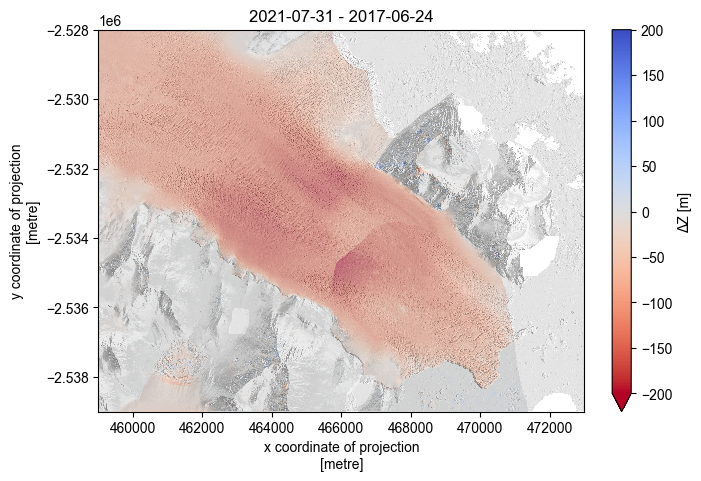

In [284]:
dz_coreg = dem_2_coreg - dem_1

plt.close()
fig, ax = plt.subplots(layout="constrained", figsize=(7, 4.7))

vrange = 200
dz_coreg.plot(cmap="coolwarm_r", vmin=-vrange, vmax=vrange, cbar_kwargs={"label": "ΔZ [m]"})
hillshade_1.plot(cmap="Greys_r", alpha=0.5, add_colorbar=False)

ax.set_aspect("equal")
ax.set_title(
    f"{gdf_sel.iloc[[1]].acqdate1.dt.date.values[0]} - {gdf_sel.iloc[[0]].acqdate1.dt.date.values[0]}"
)

# plt.savefig("../images/example_dem_difference.jpg", dpi=300)

In [295]:
cl = gpd.read_file("../data/misc/centreline_lines.geojson")
bounds = cl[cl["glacier_code"] == "UI"].bounds.values[0]

SyntaxError: can't use starred expression here (1598936536.py, line 2)

In [1]:
"""
This script automatically downloads and coregisters a complete history of ArcticDEM or
REMA strips within a given AOI. The strips will be created within a named directory in 
the current working directory.

The script will download the 2 m ArcticDEM or REMA mosaic for coregistration, and then
loop through the strip record, downloading and coregistering against stable ground
identified within the BedMachine mask.

Note: this will only work in regions of Greenland and Antarctica where bare rock
is exposed. If you require coregistration in other regions, please drop me an email - 
I would be happy to help.

Tom Chudley | thomas.r.chudley@durham.ac.uk
Durham University
November 2023
"""

import os
import rioxarray as rxr
import numpy as np
import pdemtools as pdt
import geopandas as gpd
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------------------- #
# EDIT THIS SECTION TO SPECIFY DEPENDENT FILES, THE REGION, AND BOUNDS OF INTEREST
# ----------------------------------------------------------------------------------- #

# Filepath to ArcticDEM parquet file --
# download from https://data.pgc.umn.edu/elev/dem/setsm/ArcticDEM/indexes/ArcticDEM_Strip_Index_latest_gpqt.zip
index_fpath = "../data/elevation/arcticdem/ArcticDEM_Strip_Index_s2s041.parquet"

# Filepath to BedMachine v5 netcdf file --
# download from  https://data.pgc.umn.edu/elev/dem/setsm/ArcticDEM/indexes/ArcticDEM_Strip_Index_latest_gpqt.zip
bm_fpath = "../data/misc/bedmachine/BedMachineGreenland-v5.nc"

# The name of your study area - this will be used to name output files and directories
region = "ui"

# "arcticdem" or "rema"
dataset = "arcticdem"

# the bounds of your study area, in EPSG:3413 for ArcticDEM or EPSG:3031 for REMA
centrelines = gpd.read_file("../data/misc/centreline_lines.geojson")
centreline_ui = centrelines[centrelines["glacier_code"] == "UI"]
xmin, ymin, xmax, ymax = centreline_ui.bounds.values[0]
# xmin, ymin, xmax, ymax = (486172.9, -2428049.5, 490750.8, -2426181.6)
# xmin, ymin, xmax, ymax = (490312, -2427717, 491161, -2426500)

# Parameters with which to filter ArcticDEM dataset. Note that you may wish to add
# more or less - feel free to modify the search function at line 73.
dates = "20010101/20231231"
baseline_max_hours = 24
min_aoi_frac = 0.1

# ----------------------------------------------------------------------------------- #
# END OF EDITABLE PARAMETER SECTION
# ----------------------------------------------------------------------------------- #

# define AOI
bounds = (xmin, ymin, xmax, ymax)

print(f"Downloading data for {region}:")

# Create output directory
outdir = f"../data/elevation/arcticdem/test/{region}_data"
if not os.path.exists(outdir):
    os.mkdir(outdir)

# Get reference DEM (ArcticDEM mosaic) if it doesn't already exist
reference_dem_fpath = os.path.join(outdir, f"{region}_arcticdem_mosaic_2m.tif")

if not os.path.exists(reference_dem_fpath):
    print("\nDownloading reference DEM...")

    reference_dem = pdt.load.mosaic(
        dataset=dataset,  # must be `arcticdem` or `rema`
        resolution=2,  # must be 2, 10, or 32
        bounds=bounds,  # (xmin, ymin, xmax, ymax) or shapely geometry
        version="v4.1",  # optional: desired version (defaults to most recent)
    )
    reference_dem.rio.to_raster(reference_dem_fpath, compress="ZSTD", predictor=3, zlevel=1)

else:
    print("\nLoading reference DEM...")
    reference_dem = pdt.load.from_fpath(
        os.path.join(outdir, f"{region}_arcticdem_mosaic_2m.tif"), bounds=bounds
    )

reference_dem = reference_dem.squeeze()
bedrock_mask = pdt.data.bedrock_mask_from_bedmachine(bm_fpath, reference_dem)

# Search for DEM strips
print("\nSearching for DEM strips...")
gdf = pdt.search(
    index_fpath,
    bounds,
    dates=dates,
    # months=[6, 7, 8, 9],
    # years=[2019],
    baseline_max_hours=baseline_max_hours,
    # sensors=["WV03", "WV02", "WV01"],
    # accuracy=2,
    min_aoi_frac=min_aoi_frac,
)
gdf = gdf.sort_values("acqdate1")

n_strips = len(gdf)
print(f"{n_strips} strips found")


Loading reference DEM...

Searching for DEM strips...
59 strips found


In [3]:
i = 0
print("\nDownloading DEM strips...")
for _, row in gdf.iterrows():
    date = row.acqdate1.date()
    date_str = date.strftime("%Y%m%d")
    dem_id = row.dem_id

    out_fpath = os.path.join(outdir, f"{date_str}_{dem_id}_coreg.tif")

    if not os.path.exists(out_fpath):
        print(f"\nDownloading {i}/{n_strips} {os.path.basename(out_fpath)}...")

        # preview = pdt.load.preview(row, bounds)
        # fig, ax = plt.subplots(layout="constrained")
        # preview.plot(cmap="Greys_r", add_colorbar=False)
        # plt.show()

        dem = pdt.load.from_search(row, bounds=bounds, bitmask=True)
        dem.compute()  # rioxarray uses lazy evaluation, so we can force the download using the `.compute()` function.
        dem = dem.rio.pad_box(*bounds, constant_values=np.nan)
        dem = dem.pdt.coregister(reference_dem, bedrock_mask, max_horiz_offset=50)

        # dem.rio.to_raster(out_fpath, compress="ZSTD", predictor=3, zlevel=1)
        del dem

    i += 1

print("Finished")



Planimetric Correction Iteration 1
Offset (z,x,y): 0.000, 0.000, 0.000
RMSE = 17.748737335205078
Planimetric Correction Iteration 2
Offset (z,x,y): -2.962, -2.737, 1.895
Translating: -2.96 Z, -2.74 X, 1.90 Y
RMSE = 17.141387939453125
Planimetric Correction Iteration 3
Offset (z,x,y): -2.924, -4.378, 2.801
Translating: -2.92 Z, -4.38 X, 2.80 Y
RMSE = 17.51278305053711
RMSE step in this iteration (0.37140) is above threshold (-0.001), stopping and returning values of prior iteration. 
Final offset (z,x,y): -2.962, -2.737, 1.895
Final RMSE = 17.141387939453125

Planimetric Correction Iteration 1
Offset (z,x,y): 0.000, 0.000, 0.000
RMSE = 16.91384506225586
Planimetric Correction Iteration 2
Offset (z,x,y): -1.474, -0.958, 4.373
Translating: -1.47 Z, -0.96 X, 4.37 Y
RMSE = 16.160381317138672
Planimetric Correction Iteration 3
Offset (z,x,y): -1.364, -1.213, 5.348
Translating: -1.36 Z, -1.21 X, 5.35 Y
RMSE = 16.149383544921875
Planimetric Correction Iteration 4
Offset (z,x,y): -1.328, -1.2

KeyboardInterrupt: 